Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description: Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States

Dataset-crime_data

In [33]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist 

In [34]:
# Loading Dataset
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [36]:
print(f"Missing values in each variable: \n{data.isnull().sum()}")

Missing values in each variable: 
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [37]:
print(f"Duplicated rows: {data.duplicated().sum()}")

Duplicated rows: 0


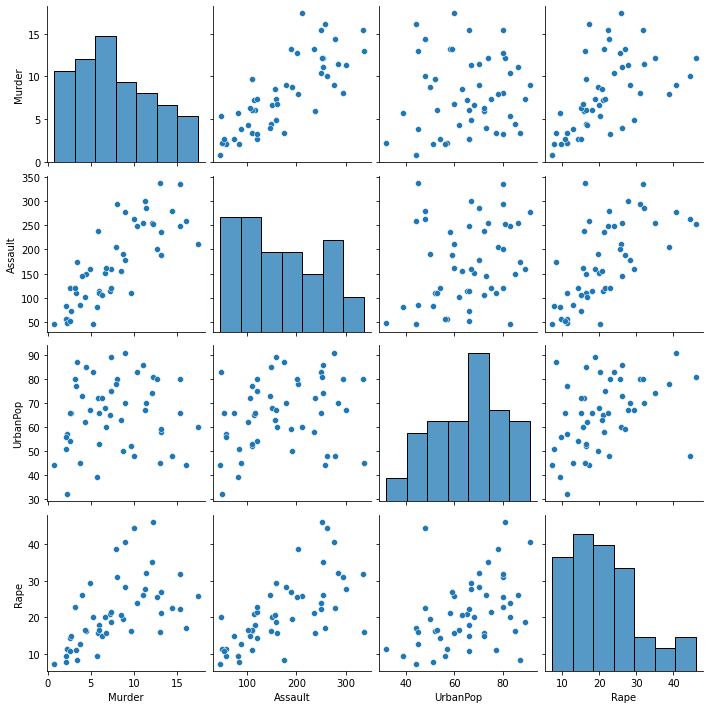

In [38]:
sns.pairplot(data.iloc[:,0:5])


# KMeans Clustering

In [39]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [40]:
df_norm = norm_func(data.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [41]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
print('Inertia : ',kmeans.inertia_)
print('Score : ',kmeans.score)

Inertia :  1.3103089001846169
Score :  <bound method KMeans.score of KMeans(n_clusters=14)>


([<matplotlib.axis.XTick at 0x25b19f4c5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

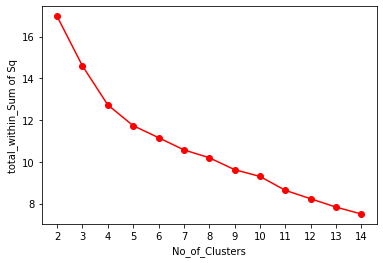

In [42]:
plt.plot(k,TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_Sum of Sq")
plt.xticks(k)

In [43]:
model1=KMeans(n_clusters=5) 
model1.fit(df_norm)

KMeans(n_clusters=5)

In [44]:
 # getting the labels of clusters assigned to each row 
model1.labels_  


# converting numpy array into pandas series object 
md=pd.Series(model1.labels_)  

#create a new column
data['clust']=md 
 
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,2


# HIERARCHIAL CLUSTERING

In [45]:
model2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model2.fit_predict(data.iloc[:,1:])

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

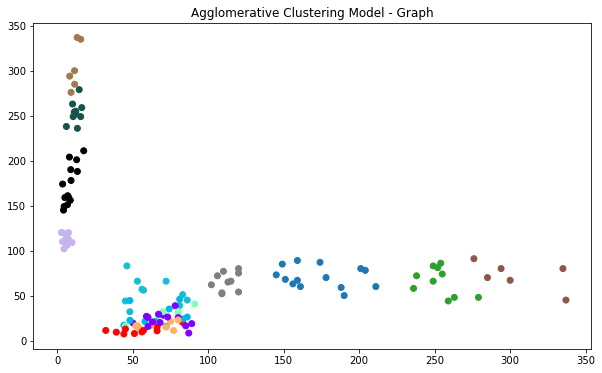

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Agglomerative Clustering Model - Graph")
plt.scatter(data.iloc[:,2], data.iloc[:,3], c=model2.labels_, cmap='tab10')
plt.scatter(data.iloc[:,3], data.iloc[:,4], c=model2.labels_, cmap='rainbow')
plt.scatter(data.iloc[:,1], data.iloc[:,2], c=model2.labels_, cmap='cubehelix')
plt.show()


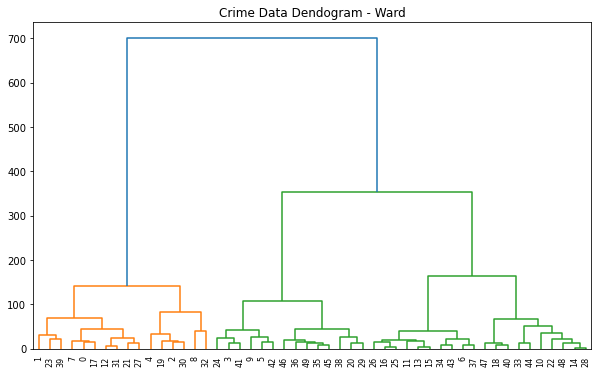

In [47]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Ward")
dend = shc.dendrogram(shc.linkage(data.iloc[:,1:], method='ward'))

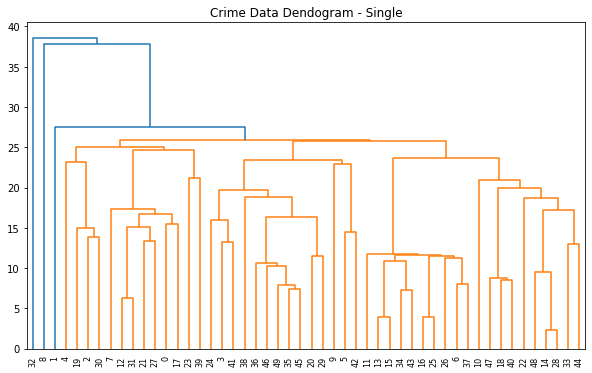

In [48]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Single")
dend = shc.dendrogram(shc.linkage(data.iloc[:,1:], method='single'))

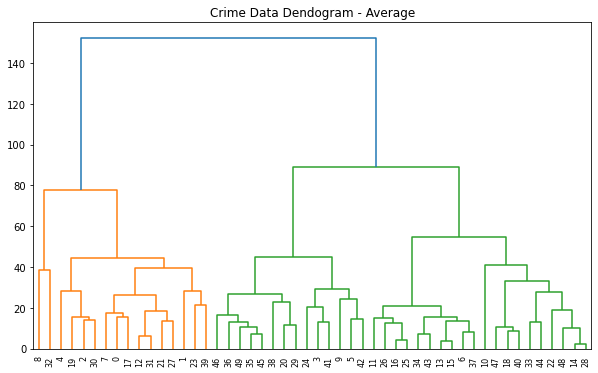

In [49]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Average")
dend = shc.dendrogram(shc.linkage(data.iloc[:,1:], method='average'))

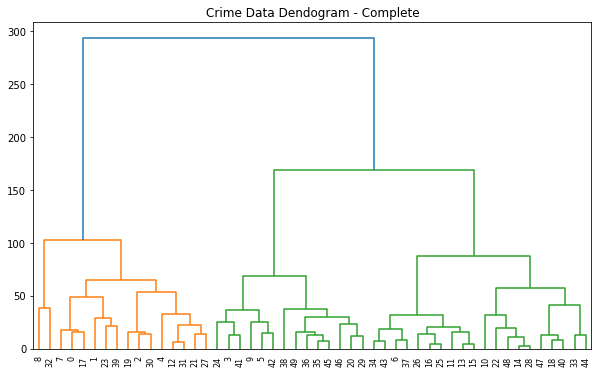

In [50]:
plt.figure(figsize=(10, 6))
plt.title("Crime Data Dendogram - Complete")
dend = shc.dendrogram(shc.linkage(data.iloc[:,1:], method='complete'))

# DBSCAN Clustering

In [51]:
model3 = DBSCAN(eps=0.30, min_samples=9)
model3.fit_predict(data.iloc[:,1:4])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

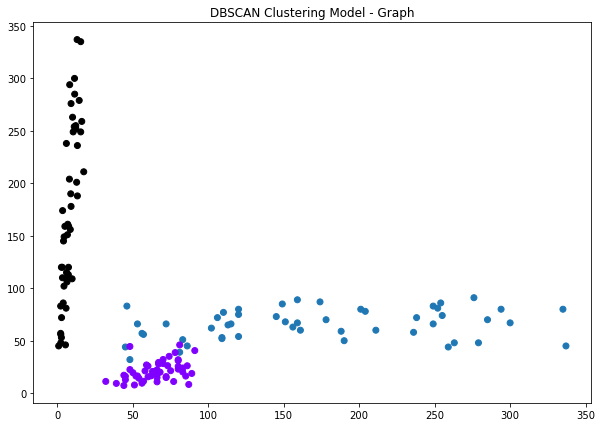

In [52]:
plt.figure(figsize=(10, 7))
plt.title("DBSCAN Clustering Model - Graph")
plt.scatter(data.iloc[:,2], data.iloc[:,3], c=model3.labels_, cmap='tab10')
plt.scatter(data.iloc[:,3], data.iloc[:,4], c=model3.labels_, cmap='rainbow')
plt.scatter(data.iloc[:,1], data.iloc[:,2], c=model3.labels_, cmap='cubehelix')
plt.show()